In [0]:
import numpy as np
data = np.array([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]])
data_raw = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1], 'Column3': data[:, 2]})
data_raw

,Column1,Column2,Column3
0,0,2,0
1,0,1,4
2,0,1,1


In [0]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# normalize the data attributes
normalized_data = preprocessing.normalize(data)
dataset = pd.DataFrame({'Column1': normalized_data[:, 0], 'Column2': normalized_data[:, 1], 'Column3': normalized_data[:, 2]})
dataset

,Column1,Column2,Column3
0,0.0,0.554700,0.000000
1,0.0,0.196116,0.784465
2,0.0,0.301511,0.301511


In [0]:
selector = VarianceThreshold()
featureSelected = selector.fit_transform(normalized_data)
dataset = pd.DataFrame({'Column2': featureSelected[:, 0], 'Column3': featureSelected[:, 1]})
dataset

,Column2,Column3
0,0.554700,0.000000
1,0.196116,0.784465
2,0.301511,0.301511


In [0]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
xdf = pd.DataFrame({'sepal length': x[:, 0], 'sepal width': x[:, 1], 'petal length': x[:, 2], 'petal width': x[:, 3], 'target': y[:, 0]})
xdf


,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [0]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


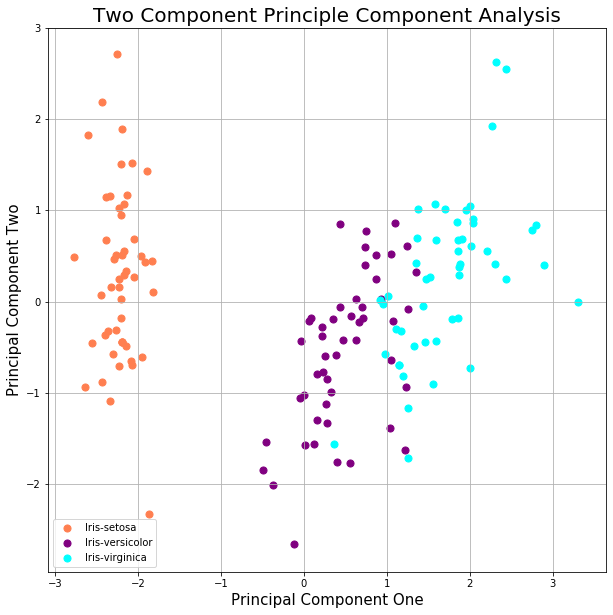

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component One', fontsize = 15)
ax.set_ylabel('Principal Component Two', fontsize = 15)
ax.set_title('Two Component Principle Component Analysis', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['coral', 'purple', 'aqua']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.72770452, 0.23030523])

In [0]:
total_variance = variance_ratio[0] + variance_ratio[1]
total_variance

0.9580097536148197

In [0]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time

# split data between train and test
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
scaler = StandardScaler()

# Fit training set only.
scaler.fit(train_img)

# Apply transform to both training set and test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

# Make an instance of the Model
pca = PCA(.9999999999999999)

# PCA fit
pca.fit(train_img)

# How many components did PCA choose?
print("\nNumber of components: %s\n" %pca.n_components_)

# Transform both train and test datasets
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# default solver is very slow, use 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

# Train the model
start_time = time.time()
logisticRegr.fit(train_img, train_lbl)
finish_time = time.time()

# Predict for Ten Observations (image)
logisticRegr.predict(test_img[0:10])

# Measure performance
logisticRegr.score(test_img, test_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)



Number of components: 711



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

0.9155

In [0]:
run_time = finish_time - start_time
run_time

67.11057138442993